In [1]:
# IMPORTS
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.optimize import curve_fit
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import trapz
import time as time
import sys

In [2]:
# READ DATA
tic = time.time()

fname = 'Tracking_1e5n_CutGas10um_CutSolid50nm_SymmetricDeposition.txt'
data_detThick = pd.read_csv(fname,
                   sep='\t',
                   names=['eventID', 'det', 'PID', 'E', 'xpos', 'ypos', 'zpos', 'dE', 'dx', 'dy','dz', 'dr','dx_cum', 'dy_cum','dz_cum', 'dr_cum'],
                   usecols=[0,1,2,3,4,5,6,7,8,11,12,15])

data_detCoinc = data_detThick
# fname = 'Tracking_1e6n_CutGas10um_CutSolid50nm_DoubleDeposition_09mmMylar.txt'
# data_detCoinc = pd.read_csv(fname,
#                    sep='\t',
#                    names=['eventID', 'det', 'PID', 'E', 'xpos', 'ypos', 'zpos', 'dE', 'dx', 'dy','dz', 'dr','dx_cum', 'dy_cum','dz_cum', 'dr_cum'],
#                    usecols=[0,1,2,3,4,5,6,7,8,11,12,15])

print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

Time Elapsed: 5.77 s


# Apply Energy Threshold

In [3]:
tic = time.time()

E_threshold = 100 #keV
N_neutrons = np.power(10,np.ceil(np.log10(data_detThick['eventID'].iloc[-1]+1))) #get number of incident neutrons from last eventID


# #--- DET THICK ---# 
# det_thick = data_detThick.loc[(data_detThick['det']=='A')]
# events_below_threshold = np.array(det_thick['eventID'].loc[(det_thick['dr_cum']==0) & (det_thick['E']<E_threshold)])
# det_thick = det_thick.loc[~(det_thick['eventID'].isin(events_below_threshold))]
# events_det_thick,events_det_thick_idx = np.unique(det_thick.loc[:,'eventID'],return_index=True);

# #--- Det thick, alpha particle ---# 
# det_thick_alpha = det_thick.loc[det_thick['PID']=='alpha']
# events_det_thick_alpha,events_det_thick_alpha_idx = np.unique(det_thick_alpha.loc[:,'eventID'],return_index=True);

# #--- Det thick, Li particle ---# 
# det_thick_Li = det_thick.loc[det_thick['PID']=='Li7']
# events_det_thick_Li,events_det_thick_Li_idx = np.unique(det_thick_Li.loc[:,'eventID'],return_index=True);


#--- DET COINC ---# 

#--- Det A ---# 
detA = data_detCoinc.loc[(data_detCoinc['det']=='A')]
events_below_threshold = np.array(detA['eventID'].loc[(detA['dr_cum']==0) & (detA['E']<E_threshold)])
detA = detA.loc[~(detA['eventID'].isin(events_below_threshold))]
events_detA,events_detA_idx = np.unique(detA.loc[:,'eventID'],return_index=True);

#--- Det A, alpha particle ---# 
detA_alpha = detA.loc[detA['PID']=='alpha']
events_detA_alpha,events_detA_alpha_idx = np.unique(detA_alpha.loc[:,'eventID'],return_index=True);

#--- Det A, Li particle ---# 
detA_Li = detA.loc[detA['PID']=='Li7']
events_detA_Li,events_detA_Li_idx = np.unique(detA_Li.loc[:,'eventID'],return_index=True);


#--- Det B ---# 
detB = data_detCoinc.loc[(data_detCoinc['det']=='B')]
events_below_threshold = np.array(detB['eventID'].loc[(detB['dr_cum']==0) & (detB['E']<E_threshold)])
detB = detB.loc[~(detB['eventID'].isin(events_below_threshold))]
events_detB,events_detB_idx = np.unique(detB.loc[:,'eventID'],return_index=True);

#--- Det B, alpha particle ---# 
detB_alpha = detB.loc[detB['PID']=='alpha']
events_detB_alpha,events_detB_alpha_idx = np.unique(detB_alpha.loc[:,'eventID'],return_index=True);

#--- Det B, Li particle ---# 
detB_Li = detB.loc[detB['PID']=='Li7']
events_detB_Li,events_detB_Li_idx = np.unique(detB_Li.loc[:,'eventID'],return_index=True);


#--- Det Coinc ---# 
detCoinc = data_detCoinc.loc[data_detCoinc['eventID'].isin(events_detA) & data_detCoinc['eventID'].isin(events_detB)]
events_coinc,events_coinc_idx = np.unique(detCoinc.loc[:,'eventID'],return_index=True);

detA_coinc = detCoinc.loc[detCoinc['det']=='A']
events_coinc_detA,events_coinc_detA_idx = np.unique(detA_coinc.loc[:,'eventID'],return_index=True);

detB_coinc = detCoinc.loc[detCoinc['det']=='B']
events_coinc_detB,events_coinc_detB_idx = np.unique(detB_coinc.loc[:,'eventID'],return_index=True);

events_coinc_detA_alpha = np.intersect1d(events_detA_alpha,events_detB_Li)
events_coinc_detA_Li = np.intersect1d(events_detA_Li,events_detB_alpha)

# ----- Print -----
# print('------ Thick Detector ------\n')
# N_events = len(np.unique(np.concatenate((det_thick_alpha['eventID'],det_thick_Li['eventID']))))
# print(str(len(events_det_thick)) + ' total neutron captures detected:')
# print('\t'+ str(len(events_det_thick_alpha)) + ' (' + str(np.round(len(events_det_thick_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 particles on det Thick')
# print('\t'+ str(len(events_det_thick_Li)) + ' (' + str(np.round(len(events_det_thick_Li)/N_neutrons*100,2)) + '%) -> \u2077Li particles on det Thick')
# print('\n Thick detector efficiency:    ' + str(np.round(len(events_det_thick)/N_neutrons*100,2)) + '%')


print('\n\n\n------ Thin Detector ------\n')
N_events = len(np.unique(np.concatenate((detA_alpha['eventID'],detA_Li['eventID'],detB_alpha['eventID'],detB_Li['eventID']))))
print(str(N_events) + ' total neutron captures detected:')
print('\t'+ str(len(events_detA_alpha)) + ' (' + str(np.round(len(events_detA_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 particles on det A')
print('\t'+ str(len(events_detA_Li)) + ' (' + str(np.round(len(events_detA_Li)/N_neutrons*100,2)) + '%) -> \u2077Li particles on det A')
print('\t'+ str(len(events_detB_alpha)) + ' (' + str(np.round(len(events_detB_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 particles on det B')
print('\t'+ str(len(events_detB_Li)) + ' (' + str(np.round(len(events_detB_Li)/N_neutrons*100,2)) + '%) -> \u2077Li particles on det B')
print('\n'+ str(len(events_coinc)) + ' coincidental neutron captures:')
print('\t'+ str(len(events_coinc_detA_alpha)) + ' (' +str(np.round(len(events_coinc_detA_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 on det A + \u2077Li on det B')
print('\t'+ str(len(events_coinc_detA_Li)) + ' (' +str(np.round(len(events_coinc_detA_Li)/N_neutrons*100,2)) + '%) -> \u2077Li on det A + \u03B1 on det B')
print('\n Total det efficiency:    ' + str(np.round(N_events/N_neutrons*100,2)) + '%')
print(' Coincidental efficiency: ' + str(np.round(len(events_coinc)/N_neutrons*100,2)) + '%')


print('\nTime Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')
del data_detThick
del data_detCoinc




------ Thin Detector ------

3686 total neutron captures detected:
	1588 (1.59%) -> α particles on det A
	974 (0.97%) -> ⁷Li particles on det A
	1560 (1.56%) -> α particles on det B
	947 (0.95%) -> ⁷Li particles on det B

1381 coincidental neutron captures:
	689 (0.69%) -> α on det A + ⁷Li on det B
	692 (0.69%) -> ⁷Li on det A + α on det B

 Total det efficiency:    3.69%
 Coincidental efficiency: 1.38%

Time Elapsed: 2.76 s


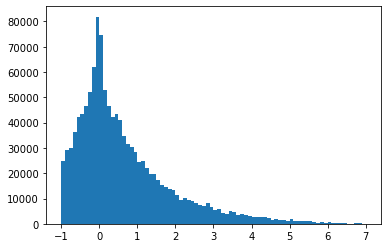

In [4]:
bin_min = -1
bin_max = 7
bin_res = .1
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)


w = detA['dE'].loc[detA['dE']>1]
plt.hist(detA['xpos'].loc[detA['dE']>1]/1e3, weights = w, bins = BINS);

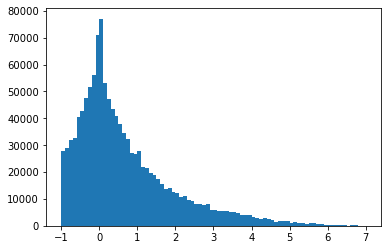

In [5]:
bin_min = -1
bin_max = 7
bin_res = .1
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)


w = detB['dE'].loc[detB['dE']>1]
plt.hist(detB['xpos'].loc[detB['dE']>1]/1e3, weights = w, bins = BINS);

NameError: name 'xpos_coinc' is not defined

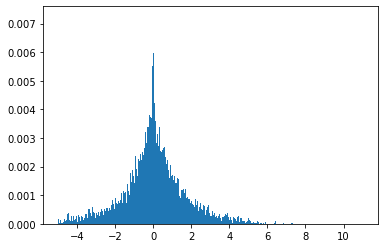

In [7]:
bin_min = -5
bin_max = 11
bin_res = .01
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)


xpos = detA['xpos'].loc[detA['dE']>1]/1e3
w = detA['dE'].loc[detA['dE']>1]
plt.hist(xpos, weights = w/sum(w), bins = BINS);


plt.hist(xpos_coinc, weights = xpos_coinc/sum(xpos_coinc), bins = BINS);

# --- Lorentzian fit --- #
def lorentzian( x, *p):
    a, x0, gam = p
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

# --- Gaussian fit --- #
from scipy.optimize import curve_fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

bin_res = bin_res/100
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

hist, bin_edges = np.histogram(xpos, weights = w/sum(w), bins = BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
coeff, var_matrix = curve_fit(lorentzian, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 4.])
hist_fit = lorentzian(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit*100,'--',color='black', label='Gaussian fit');

FWHM_AB = abs(2*coeff[2])
RSS = sum((hist-hist_fit)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('\ndet A --> x = ' + str(round(coeff[1],4)) + ' mm')
print('      --> FWHM = ' + str(round(FWHM_AB,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')


In [ ]:
BINS

In [ ]:
round(np.mean(bin_edges))

In [ ]:
max(hist)

In [9]:
# --- Limit neutron catpures --- #

N_captures = len(events_coinc)

events_det_thick = events_det_thick[:int(N_captures)]
events_det_thick_idx = events_det_thick_idx[:int(N_captures)]

events_coinc = events_coinc[:N_captures]
events_coinc_detA = events_coinc_detA[:N_captures]
events_coinc_detA_idx = events_coinc_detA_idx[:N_captures]

events_coinc_detB = events_coinc_detB[:N_captures]
events_coinc_detB_idx = events_coinc_detB_idx[:N_captures]


det_thick = det_thick.loc[det_thick['eventID'].isin(events_det_thick)]
detA_coinc = detA_coinc.loc[detA_coinc['eventID'].isin(events_coinc_detA) ]
detB_coinc = detB_coinc.loc[detB_coinc['eventID'].isin(events_coinc_detB) ]

NameError: name 'events_det_thick' is not defined

# Det A (both particles)

## Geometric Average 

In [8]:
tic = time.time()
E_ion_min = 0 # keV

# ----- x position reconstruction: Det Thick ----- #
pos_offset = min(det_thick['xpos']) # compensate min() and max() calculation when track has negative xpos valies

xmin = det_thick.loc[det_thick['E']>=E_ion_min].groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
xmax = det_thick.loc[det_thick['E']>=E_ion_min].groupby('eventID')['xpos'].max()+pos_offset
xpos_det_thick = ((xmax+xmin)/2 - pos_offset)/1e3
range_det_thick = (xmax-xmin)/1e3

# ----- x position reconstruction: Det Coinc ----- #
pos_offset = min((min(detA['xpos']),min(detB['xpos']))) # compensate min() and max() calculation when track has negative xpos valies

xmin = detA_coinc.loc[detA_coinc['E']>=E_ion_min].groupby('eventID')['xpos'].min()+pos_offset
xmax = detA_coinc.loc[detA_coinc['E']>=E_ion_min].groupby('eventID')['xpos'].max()+pos_offset
xpos_detA_coinc = ((xmax+xmin)/2 - pos_offset)/1e3

E_detA_coinc = np.array(detA_coinc.iloc[events_coinc_detA_idx]['E']) - np.array(detA_coinc.loc[detA_coinc['E']>=E_ion_min].groupby('eventID')['E'].last())

xmin = detB_coinc.loc[detB_coinc['E']>=E_ion_min].groupby('eventID')['xpos'].min()+pos_offset
xmax = detB_coinc.loc[detB_coinc['E']>=E_ion_min].groupby('eventID')['xpos'].max()+pos_offset
xpos_detB_coinc = ((xmax+xmin)/2 - pos_offset)/1e3
E_detB_coinc = np.array(detB_coinc.iloc[events_coinc_detB_idx]['E']) - np.array(detB_coinc.loc[detB_coinc['E']>=E_ion_min].groupby('eventID')['E'].last())

xpos_coinc = (np.array(xpos_detA_coinc)*E_detB_coinc + np.array(xpos_detB_coinc)*E_detA_coinc)/(E_detA_coinc+E_detB_coinc)

print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

NameError: name 'det_thick' is not defined

## Deposited Energy Weighted Average 

In [ ]:
tic = time.time()
E_ion_min = 0 # keV

# ----- x position reconstruction: Det Thick ----- #
xpos_aux = det_thick[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_det_thick = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

# ----- x position reconstruction: Det Coinc ----- #
xpos_aux = detA_coinc[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_detA_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

E_detA_coinc = np.array(detA_coinc.iloc[events_coinc_detA_idx]['E']) - np.array(detA_coinc.loc[detA_coinc['E']>=E_ion_min].groupby('eventID')['E'].last())

xpos_aux = detB_coinc[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_detB_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

E_detB_coinc = np.array(detB_coinc.iloc[events_coinc_detB_idx]['E']) - np.array(detB_coinc.loc[detB_coinc['E']>=E_ion_min].groupby('eventID')['E'].last())

xpos_coinc = (np.array(xpos_detA_coinc)*E_detB_coinc + np.array(xpos_detB_coinc)*E_detA_coinc)/(E_detA_coinc+E_detB_coinc)

print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

In [ ]:
# Position Reconstruction Normalized by dE/dx


# tic = time.time()
# E_ion_min = 0 # keV

# # ----- x position reconstruction: Det Thick ----- #
# xpos_aux = det_thick[['eventID','dE','xpos','dx']].copy()
# xpos_aux = xpos_aux.loc[xpos_aux['dx']>0]
# xpos_aux['dEdx'] =  xpos_aux['dE']/xpos_aux['dx']
# xpos_aux['xpos_weighted'] = xpos_aux['dEdx']* xpos_aux['xpos']/1e3

# xpos_det_thick = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dEdx'].sum()


# # # ----- x position reconstruction: Det Coinc ----- #
# xpos_aux = detA_coinc[['eventID','dE','xpos','dx']].copy()
# xpos_aux = xpos_aux.loc[xpos_aux['dx']>0]
# xpos_aux['dEdx'] =  xpos_aux['dE']/xpos_aux['dx']
# xpos_aux['xpos_weighted'] = xpos_aux['dEdx']* xpos_aux['xpos']/1e3
# xpos_detA_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dEdx'].sum()

# E_detA_coinc = np.array(detA_coinc.iloc[events_coinc_detA_idx]['E']) - np.array(detA_coinc.loc[detA_coinc['E']>=E_ion_min].groupby('eventID')['E'].last())

# xpos_aux = detB_coinc[['eventID','dE','xpos','dx']].copy()
# xpos_aux = xpos_aux.loc[xpos_aux['dx']>0]
# xpos_aux['dEdx'] =  xpos_aux['dE']/xpos_aux['dx']
# xpos_aux['xpos_weighted'] = xpos_aux['dEdx']* xpos_aux['xpos']/1e3
# xpos_detB_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dEdx'].sum()

# E_detB_coinc = np.array(detB_coinc.iloc[events_coinc_detB_idx]['E']) - np.array(detB_coinc.loc[detB_coinc['E']>=E_ion_min].groupby('eventID')['E'].last())

# xpos_coinc = (np.array(xpos_detA_coinc)*E_detB_coinc + np.array(xpos_detB_coinc)*E_detA_coinc)/(E_detA_coinc+E_detB_coinc)

# print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

# Position Reconstruction

## Combined Fit

In [ ]:
bin_min = -1
bin_max = 7
bin_res = .1
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

plt.figure()
plt.rc('axes', axisbelow=True)
plt.hist(xpos_det_thick,bins=BINS, label='Thick Detector', alpha=.9)
plt.hist(xpos_coinc,bins=BINS,label='Coincidence Detector', alpha=.7)

plt.grid(linestyle=':')
# plt.ylim([0,500]);

plt.xlim([bin_min,bin_max]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(abs(xlim[0])+abs(xlim[0])+1)));
plt.xlabel('x (mm)');

# --- Lorentzian fit --- #
def lorentzian( x, *p):
    a, x0, gam = p
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

# --- Gaussian fit --- #
from scipy.optimize import curve_fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# --- det A --- # 

bin_res = bin_res/10
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)


hist, bin_edges = np.histogram(xpos_det_thick, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(lorentzian, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_detA = lorentzian(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit_detA*10,'--',color='blue', label='Lorentzian fit');
FWHM_A = abs(2*coeff[2])

RSS = sum((hist-hist_fit_detA)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('det A --> x = ' + str(round(coeff[1],4)) + ' mm')
print('      --> FWHM = ' + str(round(FWHM_A,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')
xnote = .7
ynote = plt.gca().get_ylim()[1]*3/5
yspace = plt.gca().get_ylim()[1]/20

str_note = 'FWHM(thick) = ' + str(round(FWHM_A,2)) + ' mm'
plt.annotate(str_note,(xnote,ynote))
# str_note = 'R\u00B2(detA) = ' + str(round(np.sqrt(R2),4))
# plt.annotate(str_note,(xnote,ynote-yspace*3));

# --- det A&B --- # 
hist, bin_edges = np.histogram(xpos_coinc, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_coinc = gauss(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit_coinc*10,'--',color='orange', label='Gaussian fit');

FWHM_AB = abs(2.355*coeff[2])
RSS = sum((hist-hist_fit_coinc)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('\ndet A&B --> x = ' + str(round(coeff[1],4)) + ' mm')
print('\t--> FWHM = ' + str(round(FWHM_AB,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')

str_note = 'FWHM(coinc) = ' + str(round(FWHM_AB,2)) + ' mm'
plt.annotate(str_note,(xnote,ynote-yspace))
# str_note = 'R\u00B2(coinc) = ' + str(round(np.sqrt(R2),4))
# plt.annotate(str_note,(xnote,ynote-yspace*3-yspace))

print('\nFWHM(detA) / FWHM(detA&B) = ' + str(round(FWHM_A/FWHM_AB,2)))

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]);


# plt.savefig('Images/09MylarDoubleSide-lorentz_weightedEdx', dpi=300)

<!-- ## Gaussian Fit -->

## Gaussian Fit

In [ ]:
bin_min = -1
bin_max = 7
bin_res = .5
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

plt.figure()
plt.rc('axes', axisbelow=True)
plt.hist(xpos_det_thick,bins=BINS, label='Thick Detector', alpha=.9)
plt.hist(xpos_coinc,bins=BINS,label='Coincidence Detector', alpha=.7)

plt.grid(linestyle=':')
plt.xlim([bin_min,bin_max]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(abs(xlim[0])+abs(xlim[0])+1)));
plt.xlabel('x (mm)');


# --- Gaussian fit --- #
from scipy.optimize import curve_fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


# --- det A --- # 
hist, bin_edges = np.histogram(xpos_det_thick, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_detA = gauss(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit_detA,'--',color='blue', label='Gaussian fit');
FWHM_A = abs(2.355*coeff[2])

RSS = sum((hist-hist_fit_detA)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('det A --> x = ' + str(round(coeff[1],4)) + ' mm')
print('      --> FWHM = ' + str(round(FWHM_A,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')
xnote = .7
ynote = plt.gca().get_ylim()[1]*3/5
yspace = plt.gca().get_ylim()[1]/20

str_note = 'FWHM(thick) = ' + str(round(FWHM_A,2)) + ' mm'
plt.annotate(str_note,(xnote,ynote))
# str_note = 'R\u00B2(detA) = ' + str(round(np.sqrt(R2),4))
# plt.annotate(str_note,(xnote,ynote-yspace*3));

# --- det A&B --- # 
hist, bin_edges = np.histogram(xpos_coinc, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_coinc = gauss(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit_coinc,'--',color='orange', label='Gaussian fit',);

FWHM_AB = abs(2.355*coeff[2])
RSS = sum((hist-hist_fit_coinc)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('\ndet A&B --> x = ' + str(round(coeff[1],4)) + ' mm')
print('\t--> FWHM = ' + str(round(FWHM_AB,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')

str_note = 'FWHM(coinc) = ' + str(round(FWHM_AB,2)) + ' mm'
plt.annotate(str_note,(xnote,ynote-yspace))
# str_note = 'R\u00B2(coinc) = ' + str(round(np.sqrt(R2),4))
# plt.annotate(str_note,(xnote,ynote-yspace*3-yspace))

print('\nFWHM(detA) / FWHM(detA&B) = ' + str(round(FWHM_A/FWHM_AB,2)))

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]);



# plt.title('Efficiency Compensation');
# plt.title('Equal neutron exposure');
# plt.title('Detected neutrons: ' + str(N_captures));


# plt.title('Efficiency Compensation');


# plt.ylim([0,500]);
# plt.savefig('Images/09MylarDoubleSide-gauss_weightedE', dpi=300)

## Lorentzian Fit

In [ ]:
bin_min = -4
bin_max = 4
bin_res = .01
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

plt.figure()
plt.hist(xpos_detA,bins=BINS,alpha=.9)
plt.hist(xpos_coinc,bins=BINS,alpha=.7)

plt.grid(linestyle=':')
plt.xlim([-4,4]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(abs(xlim[0])+abs(xlim[0])+1)));
plt.legend(('det A', 'det A&B'));
plt.xlabel('x (mm)');
plt.title('Detectable ionization limit = ' + str(E_ion_min) + ' keV');

# plt.ylim([0,5000]);

# --- Lorentzian fit --- #
def lorentzian( x, *p):
    a, x0, gam = p
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

# --- det A --- # 
hist, bin_edges = np.histogram(xpos_detA, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(lorentzian, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_detA = lorentzian(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit_detA,'--',color='blue');

FWHM_A = abs(2*coeff[2])
RSS = sum((hist-hist_fit_detA)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('det A   --> FWHM = ' + str(round(FWHM_A,2)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')

xnote = .7
ynote = plt.gca().get_ylim()[1]*2/3
yspace = plt.gca().get_ylim()[1]/20


str_note = 'FWHM(detA) = ' + str(round(FWHM_A,2)) + ' mm'
plt.annotate(str_note,(xnote,ynote))
str_note = 'R\u00B2(detA) = ' + str(round(np.sqrt(R2),4))
plt.annotate(str_note,(xnote,ynote-yspace*3))

# --- det A&B --- # 
hist, bin_edges = np.histogram(xpos_coinc, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
coeff, var_matrix = curve_fit(lorentzian, bin_centres, hist, p0=[max(hist),round(np.mean(bin_edges)), 1.])
hist_fit_coinc = lorentzian(bin_centres, *coeff)
plt.plot(bin_centres,hist_fit_coinc,'--',color='orange');

FWHM_AB = abs(2*coeff[2])
RSS = sum((hist-hist_fit_coinc)**2)
TSS = sum((hist-np.mean(hist))**2)
R2 = 1- RSS/TSS
print('det A&B --> FWHM = ' + str(round(FWHM_AB,2)) + ' mm (R\u00B2 = ' + str(round(R2,4)) + ')')

str_note = 'FWHM(detA&B) = ' + str(round(FWHM_AB,2)) + ' mm'
plt.annotate(str_note,(xnote,ynote-yspace))
str_note = 'R\u00B2(detA&B) = ' + str(round(np.sqrt(R2),4))
plt.annotate(str_note,(xnote,ynote-yspace*3-yspace))
print('FWHM(detA) / FWHM(detA&B) = ' + str(round(FWHM_A/FWHM_AB,2)))


# savename = 'LorentzianFit_'+ str(E_ion_min) + 'keV'
# plt.savefig(savename, dpi=300)

# Stopping Power & Range plots

In [ ]:
detA = det_thick
detA_alpha = det_thick_alpha
detA_Li = det_thick_Li
events_detA = events_det_thick
events_detA_idx = events_det_thick_idx
events_detA_alpha_idx = events_det_thick_alpha_idx
events_detA_Li_idx = events_det_thick_Li_idx
xpos_detA = xpos_det_thick

In [ ]:
# ----- Stopping Power ----- #
dEdr_detA = detA['dE'].loc[(detA['dr']>0)]/detA['dr'].loc[(detA['dr']>0)]*1e3 # keV/mm
dEdx_detA = detA['dE'].loc[(detA['dx']>0)]/detA['dx'].loc[(detA['dx']>0)]*1e3 # keV/mm

dEdr_detA_alpha = detA_alpha['dE'].loc[(detA_alpha['dr']>0)]/detA_alpha['dr'].loc[(detA_alpha['dr']>0)]*1e3 # keV/mm
dEdx_detA_alpha = detA_alpha['dE'].loc[(detA_alpha['dx']>0)]/detA_alpha['dx'].loc[(detA_alpha['dx']>0)]*1e3 # keV/mm

dEdr_detA_Li = detA_Li['dE'].loc[(detA_Li['dr']>0)]/detA_Li['dr'].loc[(detA_Li['dr']>0)]*1e3 # keV/mm
dEdx_detA_Li = detA_Li['dE'].loc[(detA_Li['dx']>0)]/detA_Li['dx'].loc[(detA_Li['dx']>0)]*1e3 # keV/mm


# ----- Range ----- #
ranges_detA = np.array(detA.iloc[events_detA_idx-1]['dr_cum']/1e3)
ranges_detA = np.append(ranges_detA[1:],ranges_detA[0])

ranges_detA_alpha = np.array(detA_alpha.iloc[events_detA_alpha_idx-1]['dr_cum']/1e3)
ranges_detA_alpha = np.append(ranges_detA_alpha[1:],ranges_detA_alpha[0])

ranges_detA_Li = np.array(detA_Li.iloc[events_detA_Li_idx-1]['dr_cum']/1e3)
ranges_detA_Li = np.append(ranges_detA_Li[1:],ranges_detA_Li[0])

In [ ]:
first_event = 0
last_event = first_event+0



E = detA.loc[(detA['eventID'].isin(events_detA[first_event:last_event+1])) & (detA['dx'] >0)]['E']
dE = detA.loc[(detA['eventID'].isin(events_detA[first_event:last_event+1])) & (detA['dx'] >0)]['dE']
dr = detA.loc[(detA['eventID'].isin(events_detA[first_event:last_event+1])) & (detA['dx'] >0)]['dr']
dx = detA.loc[(detA['eventID'].isin(events_detA[first_event:last_event+1])) & (detA['dx'] >0)]['dx']
dx_cum = detA.loc[(detA['eventID'].isin(events_detA[first_event:last_event+1])) & (detA['dx'] >0)]['dx_cum']/1e3
x = detA.loc[(detA['eventID'].isin(events_detA[first_event:last_event+1])) & (detA['dx'] >0)]['xpos']/1e3


plt.figure()
plt.grid(linestyle=':')

plt.plot(dx_cum,E,'k.--', alpha = 0.4);
plt.xlabel('x (mm)');
plt.ylabel('E (keV)');
plt.title('Particle Energy');
# plt.savefig('Particle Energy', dpi=300)

# plt.hist(dx_cum,
#          weights = E,
#          bins = 100);


plt.figure()
plt.grid(linestyle=':')

plt.plot(dx_cum,dE,'k.--', alpha = 1);
plt.title('Deposited Energy');
plt.xlabel('x (mm)');
plt.ylabel('dE (keV)');
# plt.savefig('Particle Deposited Energy', dpi=300)

# plt.hist(dx_cum,
#          weights = dE,
#          bins = 100);

# plt.xlim([0,4]);
# plt.ylim([0,max(y)*1.1]);


# plt.figure()
# x_track = detA.loc[detA['eventID']==events_detA[first_event]]['xpos']/1e3
# z_track = detA.loc[detA['eventID']==events_detA[first_event]]['zpos']/1e3
# plt.plot(x_track,z_track,'k.');
# plt.plot(x_track,z_track,'k-',alpha = 0.2);
# plt.title('Particle Trajectory');
# plt.xlabel('x (mm)');
# plt.ylabel('z (mm)');


xposmax = detA.loc[detA['eventID']==events_detA[first_event]]['xpos'].max()/1e3
xposmin = detA.loc[detA['eventID']==events_detA[first_event]]['xpos'].min()/1e3
xpos = (xposmax+xposmin)/2
print('xpos by simple average = ' + str(np.round(xpos,3)) + ' mm')


dE_weight = dE

dE_weight = dE_weight/sum(dE_weight)
xpos = sum(x*dE_weight)

print('xpos by energy weight = ' + str(np.round(xpos,3)) + ' mm')

In [ ]:
#------- Plot Stopping Power -------#
bin_min = 0
bin_max = np.ceil(max(detA['dr_cum']/1e3))
bin_res = .05

h = np.histogram(detA['dr_cum'].loc[(detA['dr']>0)]/1e3,
                 weights = dEdr_detA/sum(dEdr_detA),
                 bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1));


plt.figure()
plt.rc('axes', axisbelow=True)
plt.grid(linestyle=':')


plt.plot(h[1][:-1],h[0],color='k');

plt.xlim([bin_min,8]);
plt.ylim([0,plt.gca().get_ylim()[1]]);
xlim = plt.gca().get_xlim()
# plt.xticks(np.linspace(bin_min,bin_max,int(bin_max+1)))
plt.grid(linestyle=':')
plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('distance (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('Thick detector');

# plt.fill_between(h[1][:-1],h[0][:],color='k',alpha=.4);


# #------- Calculate d50 -------#
# for index in range(0,len(h[0])):
#     index += 1;
#     area_left = trapz(h[0][:index], x=h[1][:index])
#     area_right = trapz(h[0][index:], x=h[1][index:-1])   
#     if (area_left>=area_right):
#         break
# area_left = trapz(h[0][:index], x=h[1][:index])
# area_right = trapz(h[0][index:], x=h[1][index:-1])
# print('Area left = ' + str(round(area_left,3)), end=' | ')
# print('Area right = '+ str(round(area_right,3)))

# plt.fill_between(h[1][:index+1],h[0][:index+1],color='k',alpha=.4);
# plt.fill_between(h[1][index:-1],h[0][index:],color='k',alpha=.1);

# anotation_str = 'd\u2085\u2080 = ' + str(round((h[1][index]),2)) + ' mm'
# plt.annotate(anotation_str,(h[1][index],h[0][index]*1.1));
# plt.savefig('ThickDetector_StoppingPower', dpi=300)

In [ ]:
#------- Plot Stopping Power -------#    X coordinate
bin_min = 0
bin_max = np.ceil(max(detA['dx_cum']/1e3))
bin_res = .025

E = detA.loc[(detA['eventID'].isin(events_detA)) & (detA['dr'] >0)]['E']
dE = detA.loc[(detA['eventID'].isin(events_detA)) & (detA['dr'] >0)]['dE']
dr = detA.loc[(detA['eventID'].isin(events_detA)) & (detA['dr'] >0)]['dr']
x = detA.loc[(detA['eventID'].isin(events_detA)) & (detA['dr'] >0)]['dx_cum']/1e3

y = dE

h = np.histogram(x,
                 weights = y/sum(y),
                 bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1));

plt.plot(h[1][:-1],h[0],color='k');


plt.ylim([0,plt.gca().get_ylim()[1]]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(bin_min,bin_max,int(bin_max+1)))
plt.grid(linestyle=':')
plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('x (mm)');
# plt.ylabel('Stopping Power (keV/mm)');
plt.ylabel('Particle Energy (keV)');

plt.title('Thick detector');


# plt.xlim([0.1,4]);
# #------- Calculate d50 -------#
# for index in range(0,len(h[0])):
#     index += 1;
#     area_left = trapz(h[0][:index], x=h[1][:index])
#     area_right = trapz(h[0][index:], x=h[1][index:-1])   
#     if (area_left>=area_right):
#         break
# area_left = trapz(h[0][:index], x=h[1][:index])
# area_right = trapz(h[0][index:], x=h[1][index:-1])
# print('Area left = ' + str(round(area_left,3)), end=' | ')
# print('Area right = '+ str(round(area_right,3)))

# plt.fill_between(h[1][:index+1],h[0][:index+1],color='k',alpha=.4);
# plt.fill_between(h[1][index:-1],h[0][index:],color='k',alpha=.1);

# anotation_str = 'd\u2085\u2080 = ' + str(round((h[1][index]),2)) + ' mm'
# plt.annotate(anotation_str,(h[1][index],h[0][index]*1.1));

plt.ylim([0,max(h[0][1:])]);
plt.xlim([0,4]);
# plt.savefig('ThickDetector_E_xproj', dpi=300)

In [ ]:
#------- Plot Range -------#    
bin_min = 0
bin_max = np.ceil(max(ranges_detA))
bin_res = .2
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

plt.figure()
plt.rc('axes', axisbelow=True)

h = plt.hist(ranges_detA,
         bins = BINS,
         weights = ranges_detA/sum(ranges_detA),
#          density = True,
         color='k')


plt.xlim([bin_min,bin_max]);
plt.ylim([0,plt.gca().get_ylim()[1]]);

xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

# plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('range (mm)');
plt.ylabel('Prob. density function');
plt.title('det A');

plt.grid(linestyle=':')
# plt.savefig('detA_1e6n_range', dpi=300)

# Det A - alpha 

In [ ]:
#------- Plot Stopping Power -------#
bin_min = 0
bin_max = np.ceil(max(detA_alpha['dr_cum']/1e3))
bin_res = .05

h = np.histogram(detA_alpha['dr_cum'].loc[(detA_alpha['dr']>0)]/1e3,
                 bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
                 weights = dEdr_detA_alpha/sum(dEdr_detA_alpha));

plt.plot(h[1][:-1],h[0],color='r');

plt.xlim([bin_min,bin_max]);
plt.ylim([0,plt.gca().get_ylim()[1]]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(bin_min,bin_max,int(bin_max+1)))
plt.grid(linestyle=':')
# plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('distance (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('\u03B1 particle on det A');

#------- Calculate d50 -------#
for index in range(0,len(h[0])):
    index += 1;
    area_left = trapz(h[0][:index], x=h[1][:index])
    area_right = trapz(h[0][index:], x=h[1][index:-1])   
    if (area_left>=area_right):
        break
area_left = trapz(h[0][:index], x=h[1][:index])
area_right = trapz(h[0][index:], x=h[1][index:-1])
print('Area left = ' + str(round(area_left,3)), end=' | ')
print('Area right = '+ str(round(area_right,3)))

plt.fill_between(h[1][:index+1],h[0][:index+1],color='r',alpha=.4);
plt.fill_between(h[1][index:-1],h[0][index:],color='r',alpha=.1);

anotation_str = 'd\u2085\u2080 = ' + str(round((h[1][index]),2)) + ' mm'
plt.annotate(anotation_str,(h[1][index],h[0][index]*1.1));

In [ ]:
#------- Plot Stopping Power -------#    X coordinate
bin_min = 0
bin_max = np.ceil(max(detA_alpha['dx_cum']/1e3))
bin_res = .025


h = np.histogram(detA_alpha['dx_cum'].loc[(detA_alpha['dx']>0)]/1e3,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = dEdx_detA_alpha/sum(dEdx_detA_alpha));

plt.plot(h[1][:-1],h[0],color='r');


plt.ylim([0,plt.gca().get_ylim()[1]]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(bin_min,bin_max,int(bin_max+1)))
plt.grid(linestyle=':')
plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('x (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('\u03B1 particle on det A');

#------- Calculate d50 -------#
for index in range(0,len(h[0])):
    index += 1;
    area_left = trapz(h[0][:index], x=h[1][:index])
    area_right = trapz(h[0][index:], x=h[1][index:-1])   
    if (area_left>=area_right):
        break
area_left = trapz(h[0][:index], x=h[1][:index])
area_right = trapz(h[0][index:], x=h[1][index:-1])
print('Area left = ' + str(round(area_left,3)), end=' | ')
print('Area right = '+ str(round(area_right,3)))

plt.fill_between(h[1][:index+1],h[0][:index+1],color='r',alpha=.4);
plt.fill_between(h[1][index:-1],h[0][index:],color='r',alpha=.1);

anotation_str = 'd\u2085\u2080 = ' + str(round((h[1][index]),2)) + ' mm'
plt.annotate(anotation_str,(h[1][index],h[0][index]*1.1));

plt.ylim([0,max(h[0][1:])]);
plt.xlim([0,4]);

In [ ]:
#------- Plot Range -------#    
bin_min = 0
bin_max = np.ceil(max(ranges_detA_alpha))
bin_res = .1

plt.figure()
plt.rc('axes', axisbelow=True)

plt.hist(ranges_detA_alpha,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = ranges_detA_alpha/sum(ranges_detA_alpha),
         color='r')


plt.xlim([bin_min,bin_max]);
plt.ylim([0,plt.gca().get_ylim()[1]]);

xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

# plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('range (mm)');
plt.ylabel('Prob. density function');
plt.title('\u03B1 particle on det A');

plt.grid(linestyle=':')
# plt.savefig('detA_1e6n_range', dpi=300)

# Det A - Li7

In [ ]:
#------- Plot Stopping Power -------#
bin_min = 0
bin_max = np.ceil(max(detA_Li['dr_cum']/1e3))
bin_res = .025


h = np.histogram(detA_Li['dr_cum'].loc[(detA_Li['dr']>0)]/1e3,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = dEdr_detA_Li/sum(dEdr_detA_Li));

plt.plot(h[1][:-1],h[0],color='b');

plt.xlim([bin_min,bin_max]);
plt.ylim([0,plt.gca().get_ylim()[1]]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(bin_min,bin_max,int(bin_max+1)))
plt.grid(linestyle=':')
plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('distance (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('\u2077Li particle on det A');

#------- Calculate d50 -------#
for index in range(0,len(h[0])):
    index += 1;
    area_left = trapz(h[0][:index], x=h[1][:index])
    area_right = trapz(h[0][index:], x=h[1][index:-1])   
    if (area_left>=area_right):
        break
area_left = trapz(h[0][:index], x=h[1][:index])
area_right = trapz(h[0][index:], x=h[1][index:-1])
print('Area left = ' + str(round(area_left,3)), end=' | ')
print('Area right = '+ str(round(area_right,3)))

plt.fill_between(h[1][:index+1],h[0][:index+1],color='b',alpha=.4);
plt.fill_between(h[1][index:-1],h[0][index:],color='b',alpha=.1);

anotation_str = 'd\u2085\u2080 = ' + str(round((h[1][index]),2)) + ' mm'
plt.annotate(anotation_str,(h[1][index],h[0][index]*1.1));

In [ ]:
#------- Plot Stopping Power -------#    X coordinate
bin_min = 0
bin_max = np.ceil(max(detA_Li['dx_cum']/1e3))
bin_res = .025


h = np.histogram(detA_Li['dx_cum'].loc[(detA_Li['dx']>0)]/1e3,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = dEdx_detA_Li/sum(dEdx_detA_Li));

plt.plot(h[1][:-1],h[0],color='b');

#------- Calculate d50 -------#
for index in range(0,len(h[0])):
    index += 1;
    area_left = trapz(h[0][:index], x=h[1][:index])
    area_right = trapz(h[0][index:], x=h[1][index:-1])   
    if (area_left>=area_right):
        break
area_left = trapz(h[0][:index], x=h[1][:index])
area_right = trapz(h[0][index:], x=h[1][index:-1])
print('Area left = ' + str(round(area_left,3)), end=' | ')
print('Area right = '+ str(round(area_right,3)))

plt.fill_between(h[1][:index+1],h[0][:index+1],color='b',alpha=.4);
plt.fill_between(h[1][index:-1],h[0][index:],color='b',alpha=.1);

anotation_str = 'd\u2085\u2080 = ' + str(round((h[1][index]),2)) + ' mm'
plt.annotate(anotation_str,(h[1][index],h[0][index]*1.1));

plt.ylim([0,plt.gca().get_ylim()[1]]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(bin_min,bin_max,int(bin_max+1)))
plt.grid(linestyle=':')
plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('x (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('\u2077Li particle on det A');

plt.ylim([0,max(h[0][1:])]);
plt.xlim([0,4]);

In [ ]:
#------- Plot Range -------#    
bin_min = 0
bin_max = np.ceil(max(ranges_detA_Li))
bin_res = .1

plt.figure()
plt.rc('axes', axisbelow=True)

plt.hist(ranges_detA_Li,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = ranges_detA_Li/sum(ranges_detA_Li),
         color='b')

plt.xlim([bin_min,bin_max]);
plt.ylim([0,plt.gca().get_ylim()[1]]);

xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

# plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('range (mm)');
plt.ylabel('Prob. density function');
plt.title('\u2077Li particle on det A');

plt.grid(linestyle=':')
# plt.savefig('detA_1e6n_range', dpi=300)

# Plot on same figure

In [ ]:
# ------- Plot Stopping Power on same figure -------
bin_min = 0
bin_max = 10
bin_res = .01
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)
# BINS = 1000

plt.figure()
plt.rc('axes', axisbelow=True)

plt.hist(detA_alpha['dr_cum'].loc[(detA_alpha['dr']>0)]/1e3,
         bins = BINS,
#          density = True,
#          weights = dEdr_detA_alpha/sum(dEdr_detA),
         weights = dEdr_detA_alpha/sum(dEdr_detA_alpha),
         color='r',alpha=.7)

plt.hist(detA_Li['dr_cum'].loc[(detA_Li['dr']>0)]/1e3,
         bins = BINS,
#          density = True,
#          weights = dEdr_detA_Li/sum(dEdr_detA),
         weights = dEdr_detA_Li/sum(dEdr_detA_Li),
         color='b',alpha=.7)

plt.xlim([bin_min,6]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('distance (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('det A');
plt.legend(('\u03B1 particle','\u2077Li particle'))

plt.grid(linestyle=':')
# plt.savefig('detA_alpha_1e6n', dpi=300)


In [ ]:
# ------- Plot Stopping Power on same figure -------    X coordinate
bin_min = 0
bin_max = 8
bin_res = .01
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)
# BINS = 1000

plt.figure()
plt.rc('axes', axisbelow=True)

plt.hist(detA_alpha['dx_cum'].loc[(detA_alpha['dx']>0)]/1e3,
         bins = BINS,
#          density = True,
#          weights = dEdx_detA_alpha/sum(dEdx_detA),
         weights = dEdx_detA_alpha/sum(dEdx_detA_alpha),
         color='r',alpha=.7)

plt.hist(detA_Li['dx_cum'].loc[(detA_Li['dx']>0)]/1e3,
         bins = BINS,
#          density = True,
#          weights = dEdx_detA_Li/sum(dEdx_detA),
         weights = dEdx_detA_Li/sum(dEdx_detA_Li),
         color='b',alpha=.7)



plt.ylim([0,.07])
plt.xlim([bin_min,4]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('x (mm)');
plt.ylabel('Stopping Power (keV/mm)');
plt.title('det A');
plt.legend(('\u03B1 particle','\u2077Li particle'))

plt.grid(linestyle=':')
# plt.savefig('detA_alpha_1e6n', dpi=300)


In [ ]:
# ------- Plot Range on same figure -------
bin_min = 0
bin_max = 12
bin_res = .05

plt.figure()
plt.rc('axes', axisbelow=True)
plt.grid(linestyle=':')


ranges_detA = np.array(detA.iloc[events_detA_idx-1]['dr_cum']/1e3)
ranges_detA = np.append(ranges_detA[1:],ranges_detA[0])

ranges_detA_alpha = np.array(detA_alpha.iloc[events_detA_alpha_idx-1]['dr_cum']/1e3)
ranges_detA_alpha = np.append(ranges_detA_alpha[1:],ranges_detA_alpha[0])

ranges_detA_Li = np.array(detA_Li.iloc[events_detA_Li_idx-1]['dr_cum']/1e3)
ranges_detA_Li = np.append(ranges_detA_Li[1:],ranges_detA_Li[0])



plt.hist(ranges_detA_alpha,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = ranges_detA_alpha/sum(ranges_detA),
         color='r',alpha = .7);

plt.hist(ranges_detA_Li,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = ranges_detA_Li/sum(ranges_detA),
         color='b',alpha = .7);

h = np.histogram(ranges_detA,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = ranges_detA/sum(ranges_detA))
plt.plot(h[1][1:]-bin_res/2,h[0],color='k');


ylim = plt.gca().get_ylim()
plt.ylim([0,ylim[1]]);

plt.xlim([bin_min,bin_max]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('range (mm)');
plt.ylabel('Prob. density function');
plt.title('Thick detector');
plt.legend(('Total','\u03B1 particle','\u2077Li particle'));

# plt.savefig('range_total', dpi=300)

In [ ]:
# ------- Plot Range on same figure -------       X coordinate
bin_min = 0
bin_max = 10
bin_res = .05

plt.figure()
plt.rc('axes', axisbelow=True)
plt.grid(linestyle=':')


# --- total ---
pos_offset = min(det_thick['xpos']) # compensate min() and max() calculation when track has negative xpos valies

xmin = det_thick.loc[det_thick['E']>=E_ion_min].groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
xmax = det_thick.loc[det_thick['E']>=E_ion_min].groupby('eventID')['xpos'].max()+pos_offset
xposmax_det_thick = (xmax-xmin)/1e3

h = np.histogram(xposmax_det_thick,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = abs(xposmax_det_thick)/sum(abs(xposmax_det_thick)))
plt.plot(h[1][1:]-bin_res/2,h[0],color='k');


# --- alpha ---
xmin = det_thick.loc[(det_thick['E']>=E_ion_min) & (det_thick['PID']=='alpha')].groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
xmax = det_thick.loc[(det_thick['E']>=E_ion_min) & (det_thick['PID']=='alpha')].groupby('eventID')['xpos'].max()+pos_offset
xposmax_det_thick_alpha = (xmax-xmin)/1e3

plt.hist(xposmax_det_thick_alpha,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = abs(xposmax_det_thick_alpha)/sum(abs(xposmax_det_thick)),
         color='r',alpha = .7);

# --- Li ---
xmin = det_thick.loc[(det_thick['E']>=E_ion_min) & (det_thick['PID']=='Li7')].groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
xmax = det_thick.loc[(det_thick['E']>=E_ion_min) & (det_thick['PID']=='Li7')].groupby('eventID')['xpos'].max()+pos_offset
xposmax_det_thick_Li = (xmax-xmin)/1e3

plt.hist(xposmax_det_thick_Li,
         bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
         weights = abs(xposmax_det_thick_Li)/sum(abs(xposmax_det_thick)),
         color='b',alpha = .7);



plt.gca().axes.yaxis.set_ticklabels([]);
plt.xlabel('x (mm)');
plt.ylabel('Prob. density function');
plt.title('Thick detector');
plt.legend(('Total','\u03B1 particle','\u2077Li particle'));


anotation_str = ' mean = ' + str(round(np.average(xposmax_det_thick),2)) + ' mm'
plt.annotate(anotation_str,(np.average(xposmax_det_thick),max(h[0])*1.05));
plt.plot([np.average(xposmax_det_thick), np.average(xposmax_det_thick)] , [0,max(h[0])*1.1],'k--')



ylim = plt.gca().get_ylim()
plt.ylim([0,ylim[1]]);
plt.xlim([bin_min,bin_max]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

#plt.savefig('range_x_thick_labeled', dpi=300)

In [ ]:
h[0][index]

In [ ]:
max(h[0])